In [1]:
# Import dataset from pycaret repository
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Experiment 1

In [3]:
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
# Initialize environment
from pycaret.regression import *
r1 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
# Train a linear regression model
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3001.8344,2.055815e+07,4534.1101,0.8772,0.4171,0.3509
1,3584.6376,3.302247e+07,5746.5179,0.8080,0.4634,0.3510
2,3070.6655,2.395905e+07,4894.7983,0.6966,0.5550,0.3995
3,3255.8018,2.713711e+07,5209.3294,0.7734,0.5536,0.4874
4,3317.1926,2.898258e+07,5383.5469,0.7844,0.4719,0.3091
5,3198.4262,2.437439e+07,4937.0427,0.8432,0.3685,0.2822
6,2944.1081,2.619617e+07,5118.2198,0.8218,0.3915,0.3149
7,3532.4314,3.047802e+07,5520.6903,0.8324,0.5984,0.3170
8,3181.3697,2.284526e+07,4779.6714,0.8524,0.4037,0.3498
9,3284.3362,2.908114e+07,5392.6934,0.8127,0.5160,0.3715


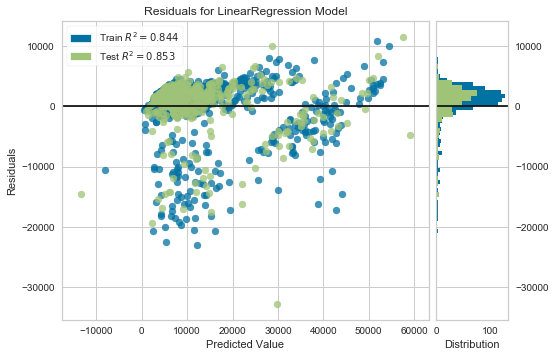

In [6]:
plot_model(lr)

## Experiment 2

In [7]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
s2[0].columns

Index(['bmi_Power2', 'age_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'bmi_Power2_multiply_smoker_no',
       'region_southeast_multiply_bmi_Power2',
       'age_Power2_multiply_bmi_Power2', 'smoker_no_multiply_bmi_Power2',
       'age_Power2_multiply_smoker_no', 'age_Power2_multiply_bmi_7.0',
       'age_Power2_multiply_children_0', 'sex_female_multiply_bmi_Power2',
       'region_northwest_multiply_bmi_Power2',
       'region_southeast_multiply_smoker_no', 'bmi_Power2_multiply_children_0',
       'smoker_no_multiply_age

In [9]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3001.8344,2.055815e+07,4534.1101,0.8772,0.4171,0.3509
1,3584.6376,3.302247e+07,5746.5179,0.8080,0.4634,0.3510
2,3070.6655,2.395905e+07,4894.7983,0.6966,0.5550,0.3995
3,3255.8018,2.713711e+07,5209.3294,0.7734,0.5536,0.4874
4,3317.1926,2.898258e+07,5383.5469,0.7844,0.4719,0.3091
5,3198.4262,2.437439e+07,4937.0427,0.8432,0.3685,0.2822
6,2944.1081,2.619617e+07,5118.2198,0.8218,0.3915,0.3149
7,3532.4314,3.047802e+07,5520.6903,0.8324,0.5984,0.3170
8,3181.3697,2.284526e+07,4779.6714,0.8524,0.4037,0.3498
9,3284.3362,2.908114e+07,5392.6934,0.8127,0.5160,0.3715


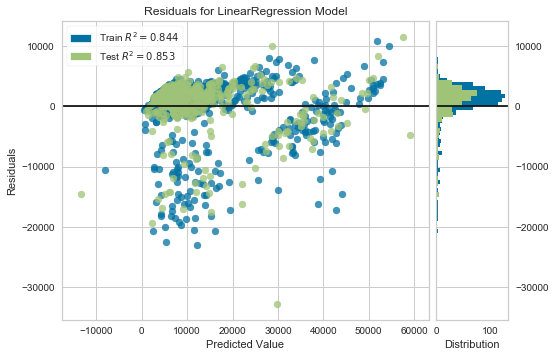

In [10]:
plot_model(lr)

In [11]:
# save transformation pipeline and model 
save_model(lr, model_name = 'deployment_26072020')

Transformation Pipeline and Model Succesfully Saved


In [13]:
deployment_26072020 = load_model('deployment_26072020')

Transformation Pipeline and Model Sucessfully Loaded


In [14]:
deployment_26072020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [22]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

KeyboardInterrupt: 